In [1]:
import numpy as np
import pandas as pd

In [19]:
df_region = pd.read_csv("/Users/charvigupta/Desktop/FDS_intern_written_test_data1_region.csv")
df_region

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
...,...,...
100168,99996,Chicago
100169,99997,New York
100170,99998,San Diego
100171,99999,Chicago


In [2]:
df_fico = pd.read_csv("/Users/charvigupta/Desktop/FDS_intern_written_test_data1_fico.csv")
df_fico

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS


In [3]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [4]:
df_fico['FICO'].value_counts().index.values.tolist()

['850',
 '836',
 '845',
 '828',
 '841',
 '820',
 '839',
 '842',
 '838',
 '834',
 '837',
 '830',
 '827',
 '835',
 '844',
 '840',
 '831',
 '811',
 '849',
 '833',
 '843',
 '832',
 '848',
 '847',
 '829',
 '825',
 '793',
 '824',
 '822',
 '802',
 '823',
 '814',
 '821',
 '818',
 '819',
 '816',
 '785',
 '809',
 '826',
 '817',
 '808',
 '813',
 '767',
 '807',
 '812',
 '777',
 '815',
 '803',
 '806',
 '797',
 '801',
 '805',
 '799',
 '804',
 '788',
 '796',
 '792',
 '759',
 '786',
 '750',
 '800',
 '784',
 '768',
 '798',
 '790',
 '783',
 '773',
 '780',
 '781',
 '789',
 '758',
 '794',
 '766',
 '776',
 '765',
 '795',
 '771',
 '778',
 '791',
 '769',
 '782',
 '770',
 '787',
 '772',
 '732',
 '742',
 '775',
 '761',
 '746',
 '779',
 '755',
 '749',
 '762',
 '747',
 '748',
 '756',
 '764',
 '739',
 '751',
 '763',
 '745',
 '753',
 '760',
 '757',
 '740',
 '752',
 '754',
 '741',
 '743',
 '718',
 '744',
 '724',
 '735',
 '730',
 '716',
 '726',
 '734',
 '733',
 '725',
 '727',
 '728',
 '736',
 '731',
 '721',
 '720',


In [5]:
## Finding Duplicates
duplicate_indices = df_fico[df_fico['acct_id'].duplicated()].index.values.tolist()

In [6]:
duplicate_indices

[140,
 190,
 192,
 194,
 196,
 30506,
 30508,
 30510,
 30512,
 30514,
 30516,
 30518,
 30520]

all duplicates have the same values, so we can drop them

In [7]:
# df_fico_deduplicated = df_fico.drop_duplicates(subset=['acct_id'])
# df_fico_deduplicated.shape
# sorted(df_fico_deduplicated['FICO'].value_counts().index.values)

In [8]:
### Missing values
missing_indices = df_fico[df_fico['FICO'].isna()==True].index.values.tolist()
missing_indices

[10,
 17,
 40,
 42,
 43,
 45,
 46,
 47,
 56,
 58,
 63,
 64,
 68,
 84,
 91,
 103,
 106,
 113,
 119,
 123,
 130,
 135,
 136,
 144,
 145,
 146,
 149,
 162,
 167,
 184,
 186,
 187,
 199,
 200,
 218,
 220,
 230,
 232,
 237,
 239,
 244,
 250,
 253,
 260,
 261,
 266,
 292,
 299,
 300,
 313,
 314,
 316,
 324,
 332,
 335,
 337,
 354,
 373,
 374,
 379,
 388,
 392,
 397,
 398,
 404,
 420,
 437,
 438,
 439,
 443,
 452,
 457,
 471,
 476,
 484,
 486,
 492,
 494,
 498,
 501,
 516,
 518,
 520,
 522,
 535,
 560,
 570,
 576,
 577,
 590,
 600,
 605,
 623,
 624,
 627,
 633,
 637,
 650,
 656,
 659,
 661,
 665,
 683,
 688,
 695,
 696,
 703,
 713,
 716,
 717,
 719,
 720,
 721,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 745,
 746,
 747,
 749,
 750,
 751,
 752,
 753,
 754,
 756,
 759,
 760,
 761,
 764,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 779,
 781,
 782,
 783,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 

In [9]:
# Find error values
error_indices = df_fico[(df_fico['FICO']=='AA')|(df_fico['FICO']=='SSS')].index.values.tolist()

In [10]:
# Total error indices = 

all_error_indices = sorted(list(set(error_indices).union(set(duplicate_indices).union(set(missing_indices)))))


In [11]:
len(all_error_indices)

29627

In [ ]:
def apply_missing(df):
    for index, row in df.iterrows():
        if index in all_error_indices:
            df.at[index, 'FICO'] = "Missing"
    return df

In [ ]:
df_result = apply_missing(df_fico.copy())

In [ ]:
df_result.to_csv("q1_1.csv", index=False)

## Part 1.2

In [129]:
df_fico.shape

(100013, 2)

In [130]:
# removing duplicate entries

df_fico[df_fico['acct_id'].isin(df_fico['acct_id'][df_fico['acct_id'].duplicated()])].sort_values("acct_id")


,acct_id,FICO
139,140,752
140,140,752
189,189,745
190,189,745
191,190,828
192,190,828
193,191,752
194,191,752
195,192,850
196,192,850


In [131]:
df_fico_deduplicated = df_fico.drop_duplicates(subset=['acct_id'])
df_fico_deduplicated = df_fico_deduplicated.reset_index(drop=True)

In [132]:
df_fico_deduplicated['acct_id']

0             1
1             2
2             3
3             4
4             5
          ...  
99995     99996
99996     99997
99997     99998
99998     99999
99999    100000
Name: acct_id, Length: 100000, dtype: int64

In [133]:
df_fico_deduplicated

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
99995,99996,NaN
99996,99997,NaN
99997,99998,NaN
99998,99999,SSS


In [134]:
df_fico_deduplicated['acct_id'].isna().sum()

0

In [135]:
df_region_deduplicated = df_region.drop_duplicates(subset=['acct_id'])
df_region_deduplicated = df_region_deduplicated.reset_index(drop=True)

In [136]:
# df_region[df_region['acct_id'].isin(df_region['acct_id'][df_region['acct_id'].duplicated()])].sort_values("acct_id")


In [137]:
df_region_deduplicated

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
...,...,...
99995,99996,Chicago
99996,99997,New York
99997,99998,San Diego
99998,99999,Chicago


In [138]:
df_region_deduplicated.shape, df_fico_deduplicated.shape

((100000, 2), (100000, 2))

In [139]:
df_region_deduplicated.dtypes, df_fico_deduplicated.dtypes

(acct_id     int64
 region     object
 dtype: object,
 acct_id     int64
 FICO       object
 dtype: object)

In [140]:
df_region_deduplicated['acct_id'].isin(df_fico_deduplicated['acct_id'])

0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: acct_id, Length: 100000, dtype: bool

In [141]:
result = pd.merge(df_fico_deduplicated, df_region_deduplicated, how="left")







In [142]:
result

,acct_id,FICO,region
0,1,768,New York
1,2,850,Dallas
2,3,677,Los Angeles
3,4,843,Chicago
4,5,796,Philadelphia
...,...,...,...
99995,99996,NaN,Chicago
99996,99997,NaN,New York
99997,99998,NaN,San Diego
99998,99999,SSS,Chicago


In [72]:
## temp Drop rows with missing values in FICO

In [143]:
res_temp = result.dropna(subset='FICO')
print(result.shape, res_temp.shape)

(100000, 3) (70388, 3)


In [144]:
res_temp2 = res_temp[(res_temp['FICO']!='AA')]
res_temp3 = res_temp2[(res_temp2['FICO']!='SSS')]

print(res_temp2.shape, res_temp.shape)

(70387, 3) (70388, 3)


In [145]:
res_temp3['FICO'] = res_temp3['FICO'].astype('int64')

/var/folders/qb/wmdrw3xx75vd1jpzfxx7n_mh0000gn/T/ipykernel_64677/1264961730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_temp3['FICO'] = res_temp3['FICO'].astype('int64')


In [146]:
comp = (res_temp3.groupby(['region'], as_index=False)['FICO'].mean())

In [148]:
comp['FICO'] = comp['FICO'].astype(int)

In [149]:
comp

,region,FICO
0,Charlotte,785
1,Chicago,785
2,Dallas,783
3,Houston,786
4,Los Angeles,789
5,New York,785
6,Philadelphia,785
7,Phoenix,788
8,San Antonio,784
9,San Diego,784


In [150]:
def fill_avg_region_fico(df, comp):
    for index, row in df.iterrows():
        try:
            if df.at[index, 'FICO'].isnumeric:
                df.at[index, 'FICO'] = int(df.at[index, 'FICO'])
            else:
                reg = df.at[index, 'region']
                df.at[index, 'FICO'] = comp[comp['region']==reg]['FICO'].values.tolist()[0]
        except:
            reg = df.at[index, 'region']
            df.at[index, 'FICO'] = comp[comp['region']==reg]['FICO'].values.tolist()[0]
    return df

In [151]:
result

,acct_id,FICO,region
0,1,768,New York
1,2,850,Dallas
2,3,677,Los Angeles
3,4,843,Chicago
4,5,796,Philadelphia
...,...,...,...
99995,99996,NaN,Chicago
99996,99997,NaN,New York
99997,99998,NaN,San Diego
99998,99999,SSS,Chicago


In [152]:
final1 = fill_avg_region_fico(result.copy(), comp)
final1

,acct_id,FICO,region
0,1,768,New York
1,2,850,Dallas
2,3,677,Los Angeles
3,4,843,Chicago
4,5,796,Philadelphia
...,...,...,...
99995,99996,785,Chicago
99996,99997,785,New York
99997,99998,784,San Diego
99998,99999,785,Chicago


In [159]:
final1['FICO'] = final1['FICO'].astype(int)

In [160]:
final1.to_csv("q1_3.csv", index=False)

<AxesSubplot: >

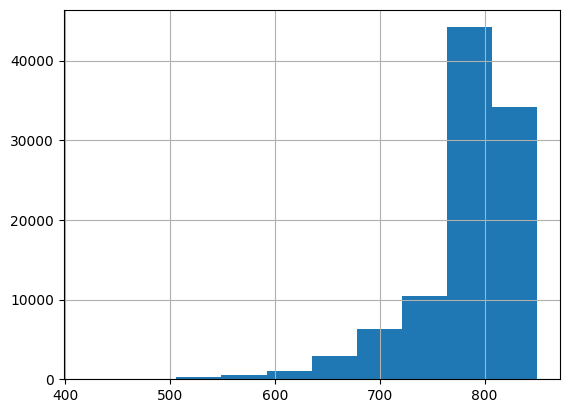

In [161]:
final1['FICO'].hist()

In [162]:
final1['FICO'].dtype

dtype('int64')

In [168]:
pd.qcut(final1['FICO'], q=5, labels=['A', 'B', 'C', 'D', 'E'])

0        B
1        E
2        A
3        E
4        D
        ..
99995    B
99996    B
99997    B
99998    B
99999    B
Name: FICO, Length: 100000, dtype: category
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']

In [171]:
pd.qcut(final1['FICO'], q=5)

0          (758.0, 785.0]
1          (836.0, 850.0]
2        (419.999, 758.0]
3          (836.0, 850.0]
4          (791.0, 836.0]
               ...       
99995      (758.0, 785.0]
99996      (758.0, 785.0]
99997      (758.0, 785.0]
99998      (758.0, 785.0]
99999      (758.0, 785.0]
Name: FICO, Length: 100000, dtype: category
Categories (5, interval[float64, right]): [(419.999, 758.0] < (758.0, 785.0] < (785.0, 791.0] < (791.0, 836.0] < (836.0, 850.0]]

In [172]:
final1['cut'] = pd.qcut(final1['FICO'], q=5)
final1['cut_bucket'] = pd.qcut(final1['FICO'], q=5, labels=['A', 'B', 'C', 'D', 'E'])


In [173]:
final1

,acct_id,FICO,region,cut,cut_bucket
0,1,768,New York,"(758.0, 785.0]",B
1,2,850,Dallas,"(836.0, 850.0]",E
2,3,677,Los Angeles,"(419.999, 758.0]",A
3,4,843,Chicago,"(836.0, 850.0]",E
4,5,796,Philadelphia,"(791.0, 836.0]",D
...,...,...,...,...,...
99995,99996,785,Chicago,"(758.0, 785.0]",B
99996,99997,785,New York,"(758.0, 785.0]",B
99997,99998,784,San Diego,"(758.0, 785.0]",B
99998,99999,785,Chicago,"(758.0, 785.0]",B


In [212]:
ans = {}
keys = sorted(final1['cut'].value_counts().index.tolist())
values = sorted(final1['cut'].value_counts().values.tolist())

final1['cut'].value_counts()

(758.0, 785.0]      29137
(791.0, 836.0]      20646
(419.999, 758.0]    20233
(836.0, 850.0]      19226
(785.0, 791.0]      10758
Name: cut, dtype: int64

In [213]:
ans = {str(k):int(v) for k,v in zip(keys, values)}

In [214]:
sorted(final1['cut'].value_counts().index)

[Interval(419.999, 758.0, closed='right'),
 Interval(758.0, 785.0, closed='right'),
 Interval(785.0, 791.0, closed='right'),
 Interval(791.0, 836.0, closed='right'),
 Interval(836.0, 850.0, closed='right')]

In [215]:
ans

{'(419.999, 758.0]': 10758,
 '(758.0, 785.0]': 19226,
 '(785.0, 791.0]': 20233,
 '(791.0, 836.0]': 20646,
 '(836.0, 850.0]': 29137}

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 5 artists>

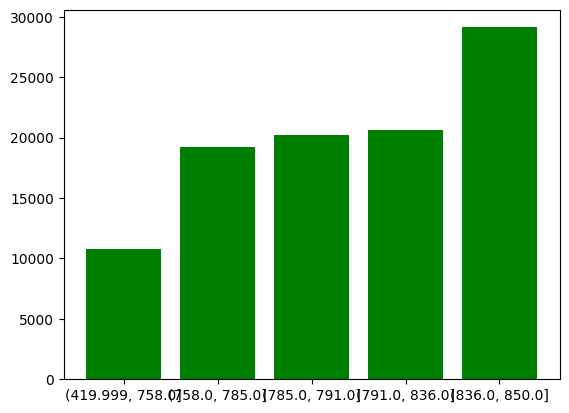

In [216]:
plt.bar(list(ans.keys()), ans.values(), color='g')